# Rock Paper Scissors


# 1. Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

./model_cnn_final.h5
./paper\04l5I8TqdzF9WDMJ.png
./rock\00nKV8oHuTGi20gq.png
./scissors\0657zSfiTYzP2jrl.png


## Setting variables


In [2]:
directory = './'
print(os.listdir(directory))

['model_cnn_final.h5', 'paper', 'rock', 'Rock_Paper_Scissors.ipynb', 'scissors']


In [3]:
labels = ['paper', 'scissors', 'rock']
num_classes = len(labels)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 2. Data Preprocessing


### Dividing the Images and Labels


In [5]:
def input_target_split(train_dir, labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir, label)
        for image in os.listdir(folder):
            img = load_img(os.path.join(folder, image), target_size=(150, 150))
            img = img_to_array(img)
            img = img/255.0
            dataset.append([img, count])
        print(f"\nCompleted: {label}", end='')
        count += 1

    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [6]:
X, y = input_target_split(directory, labels)


Completed: paper
Completed: scissors
Completed: rock

### Visualizing the Images


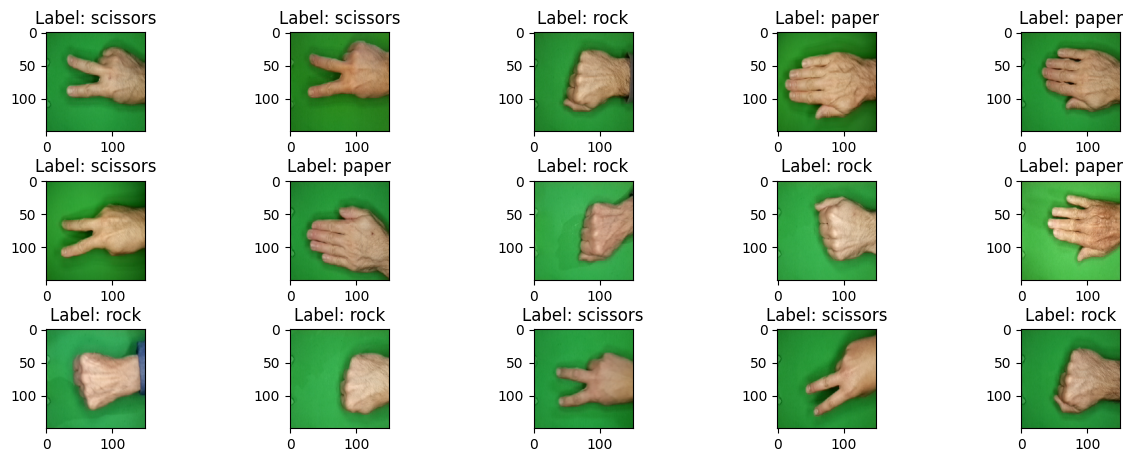

In [7]:
plt.figure(figsize=(15, 9))
n = 0
for i in range(15):
    n += 1
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [8]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([715, 754, 730], dtype=int64))

### Splitting the images and labels into training and test set


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
print(np.unique(y_train, return_counts=True),
      np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([624, 638, 607], dtype=int64)) (array([0, 1, 2]), array([ 91, 116, 123], dtype=int64))


### Applying Data Augmentation Techniques


In [10]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=360,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [11]:
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

# 3. Building the Model


### Defining the CNN Model


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

### Compiling the model with its optimizer, loss function and metric


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 512)               2

### Defining the callbacks for the model such as EarlyStopping and Best Model Checkpoint


In [15]:
filepath = "model_cnn_final.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                             patience=3,
#                                             verbose=1,
#                                             factor=0.2,
#                                             min_lr=0.00001)

callbacks_list = [
    checkpoint,
    early_stopping,
    #         learning_rate_reduction
]

In [16]:
hist = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                 validation_data=testgen.flow(
    X_test, y_test, batch_size=32),
    epochs=50,
    callbacks=callbacks_list)

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 1.3077 - accuracy: 0.3569
Epoch 1: val_accuracy improved from -inf to 0.49394, saving model to model_cnn_final.h5
59/59 [==============================] - 14s 190ms/step - loss: 1.3077 - accuracy: 0.3569 - val_loss: 1.0259 - val_accuracy: 0.4939
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 1.0659 - accuracy: 0.3922
Epoch 2: val_accuracy improved from 0.49394 to 0.72424, saving model to model_cnn_final.h5
59/59 [==============================] - 11s 179ms/step - loss: 1.0659 - accuracy: 0.3922 - val_loss: 0.9180 - val_accuracy: 0.7242
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 1.0010 - accuracy: 0.5045
Epoch 3: val_accuracy improved from 0.72424 to 0.83030, saving model to model_cnn_final.h5
59/59 [==============================] - 12s 203ms/step - loss: 1.0010 - accuracy: 0.5045 - val_loss: 0.6528 - val_accuracy: 0.8303
Epoch 4/50
59/59 [==============================] - 

In [17]:
model_saved = tf.keras.models.load_model('model_cnn_final.h5')

# 4. Predicting the Model


In [18]:
y_pred = model_saved.predict(X_test)
pred = np.argmax(y_pred, axis=1)
print(pred)

11/11 [==============================] - 0s 25ms/step
[1 2 0 0 1 2 1 1 1 0 2 0 2 2 1 2 2 2 0 1 1 1 1 1 1 1 2 1 0 1 2 2 0 2 2 2 0
 2 1 2 2 2 0 2 1 1 1 2 2 0 2 1 1 2 0 0 0 2 1 0 1 1 2 2 2 2 2 1 2 2 0 0 1 1
 2 0 2 1 1 2 2 2 2 0 0 1 1 2 1 1 1 2 2 1 1 2 2 1 1 0 1 1 1 0 2 0 1 1 2 1 1
 1 2 2 2 1 0 2 0 0 0 0 1 0 1 0 1 1 2 1 1 1 0 2 0 2 2 0 1 1 1 2 2 0 0 1 1 0
 0 0 0 0 1 2 0 1 2 1 1 0 0 2 1 2 2 1 0 0 2 2 0 1 2 1 1 1 2 0 1 2 2 2 2 0 1
 0 0 2 2 0 2 1 2 2 0 1 0 2 2 1 2 0 1 2 2 2 0 1 0 1 0 2 0 0 2 0 0 1 2 2 0 1
 0 2 0 0 1 1 2 2 2 0 0 1 2 1 2 0 2 1 2 1 1 2 2 1 2 0 2 1 0 0 2 1 0 1 0 2 0
 0 1 2 1 2 2 1 0 1 1 0 2 0 0 0 1 2 2 0 1 1 1 2 1 0 2 0 2 0 1 1 0 0 1 2 1 0
 0 2 1 2 1 0 0 1 2 2 1 1 1 1 0 2 1 0 2 0 1 2 1 2 1 0 2 2 2 1 2 2 0 2]


In [19]:
ground = np.argmax(y_test, axis=1)

### Classification Report of the model


In [20]:
from sklearn.metrics import classification_report

print(classification_report(ground, pred, target_names=labels))

              precision    recall  f1-score   support

       paper       0.97      1.00      0.98        91
    scissors       1.00      1.00      1.00       116
        rock       1.00      0.98      0.99       123

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

